In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_main = pd.read_csv("train_csv2022.csv")
df_main.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,...,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,...,0,0,0,1,0,33012,0,0,1500,4716
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,...,0,0,0,1,0,74907,1,1,300,24969
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,...,0,0,0,0,0,217314,1,0,1300,24146
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,...,1,0,0,1,0,217560,1,1,3600,36260
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,...,1,1,1,1,0,704624,1,1,200,176156


In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114480 entries, 0 to 114479
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Property_ID       114480 non-null  int64 
 1   room              114480 non-null  int64 
 2   layout_type       114480 non-null  object
 3   property_type     114480 non-null  object
 4   locality          114480 non-null  object
 5   area              114480 non-null  int64 
 6   furnish_type      114480 non-null  object
 7   bathroom          114480 non-null  int64 
 8   city              114480 non-null  object
 9   parking_spaces    114480 non-null  int64 
 10  floor             114480 non-null  int64 
 11  pet_friendly      114480 non-null  int64 
 12  power_backup      114480 non-null  int64 
 13  washing_machine   114480 non-null  int64 
 14  air_conditioner   114480 non-null  int64 
 15  geyser/solar      114480 non-null  int64 
 16  security_deposit  114480 non-null  int

In [4]:
df_main.isnull().sum() #checking for null values

Property_ID         0
room                0
layout_type         0
property_type       0
locality            0
area                0
furnish_type        0
bathroom            0
city                0
parking_spaces      0
floor               0
pet_friendly        0
power_backup        0
washing_machine     0
air_conditioner     0
geyser/solar        0
security_deposit    0
CCTV/security       0
lift                0
neighbourhood       0
price               0
dtype: int64

In [5]:
#seperating numerical and categorical data
cat_data = df_main.select_dtypes(include="object")
num_data = df_main.select_dtypes(include=np.number)

In [6]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114480 entries, 0 to 114479
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   layout_type    114480 non-null  object
 1   property_type  114480 non-null  object
 2   locality       114480 non-null  object
 3   furnish_type   114480 non-null  object
 4   city           114480 non-null  object
dtypes: object(5)
memory usage: 4.4+ MB


In [7]:
for i in cat_data.columns:
    print(df_main[i].value_counts())

BHK    97415
RK     17065
Name: layout_type, dtype: int64
Apartment            73773
Independent Floor    21925
Independent House    11446
Studio Apartment      4889
Villa                 2028
Penthouse              419
Name: property_type, dtype: int64
Thane West                  2699
Chembur                     2069
Andheri East                1996
Bopal                       1714
Kharghar                    1538
                            ... 
Jai Nagar                      1
5th Phase JP Nagar             1
Godrej Woodsman Estate         1
Jayanagar 3rd Block East       1
Parui Mauza                    1
Name: locality, Length: 3512, dtype: int64
Semi-Furnished    54103
Unfurnished       35217
Furnished         25160
Name: furnish_type, dtype: int64
Mumbai       39873
Delhi        19402
Bangalore    13678
Pune         13356
Ahmedabad    11030
Hyderabad     6234
Kolkata       5776
Chennai       5131
Name: city, dtype: int64


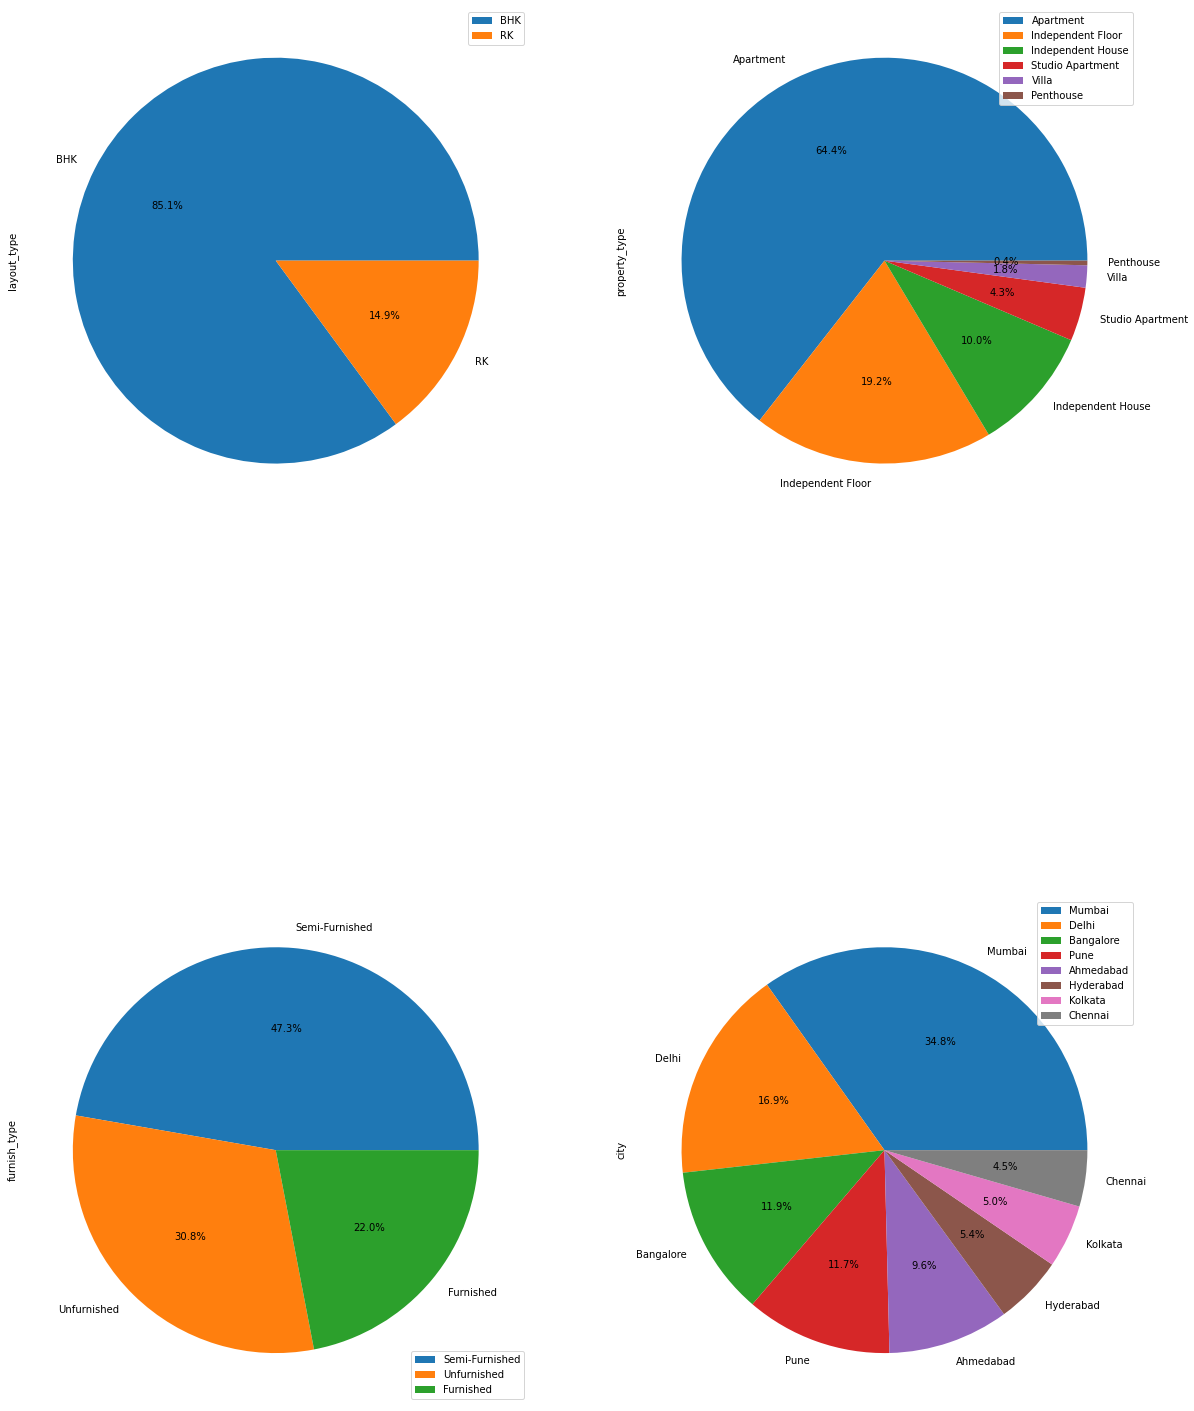

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(20, 30))
cat_data_wo_locality = df_main[['layout_type', "property_type", "furnish_type", "city"]]
for i, subplot in zip(cat_data_wo_locality, ax.flatten()):
    (pd.DataFrame(cat_data_wo_locality[i].value_counts())).plot.pie(y = i, autopct= '%.1f%%', ax= subplot)
plt.show()

In [9]:
len(df_main.locality.unique())

3512

In [10]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114480 entries, 0 to 114479
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Property_ID       114480 non-null  int64
 1   room              114480 non-null  int64
 2   area              114480 non-null  int64
 3   bathroom          114480 non-null  int64
 4   parking_spaces    114480 non-null  int64
 5   floor             114480 non-null  int64
 6   pet_friendly      114480 non-null  int64
 7   power_backup      114480 non-null  int64
 8   washing_machine   114480 non-null  int64
 9   air_conditioner   114480 non-null  int64
 10  geyser/solar      114480 non-null  int64
 11  security_deposit  114480 non-null  int64
 12  CCTV/security     114480 non-null  int64
 13  lift              114480 non-null  int64
 14  neighbourhood     114480 non-null  int64
 15  price             114480 non-null  int64
dtypes: int64(16)
memory usage: 14.0 MB


In [11]:
df_main_wo_id = df_main.drop(columns="Property_ID", axis=1)

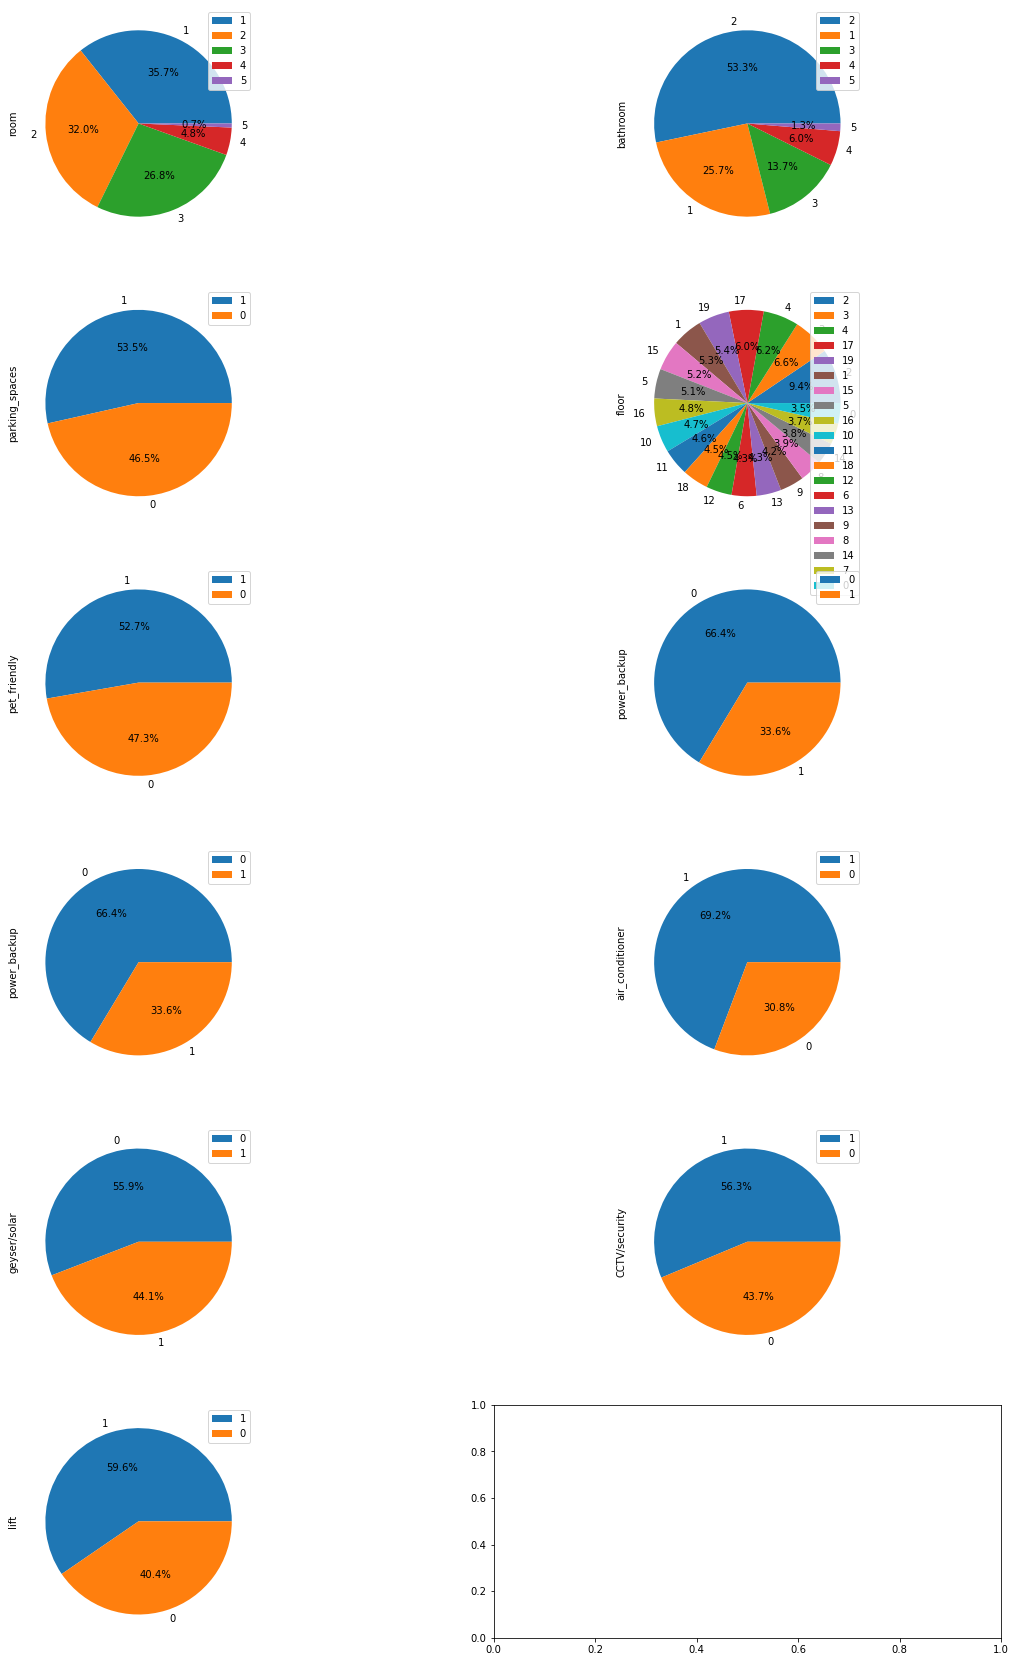

In [12]:
obj_cols = ['room', 'bathroom','parking_spaces', 'floor', 'pet_friendly','power_backup', 'power_backup', 'air_conditioner', 'geyser/solar', 'CCTV/security', "lift"]
fig, ax = plt.subplots(nrows = 6, ncols=2, figsize=(20, 30))

for i, subplot in zip(obj_cols, ax.flatten()):
    (pd.DataFrame(df_main_wo_id[i].value_counts())).plot.pie(y = i, autopct= '%.1f%%', ax= subplot)
plt.show()


Above graphs are of all ordinal variables

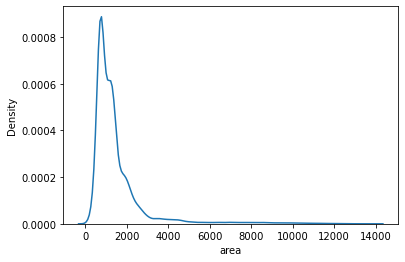

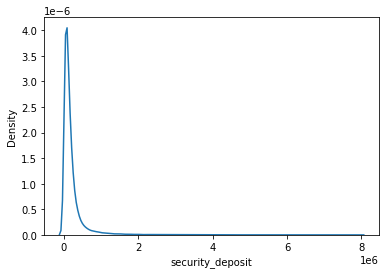

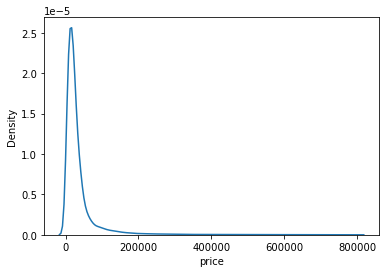

In [13]:
continuous_var = ['area', 'security_deposit', 'price']
for i in continuous_var:
    sns.kdeplot(df_main_wo_id[i])
    plt.show()

In [14]:
# Outlier removal
print(df_main_wo_id.shape)
Q1 = df_main_wo_id.quantile(0.25)
Q3 = df_main_wo_id.quantile(0.75)
IQR = Q3 - Q1
df_main_wo_id = df_main_wo_id[~((df_main_wo_id < (Q1 - 1.5 * IQR)) | (df_main_wo_id > (Q3 + 1.5 * IQR))).any(axis=1)]
df_main_wo_id.shape

(114480, 20)


C:\Users\sneha\AppData\Local\Temp/ipykernel_12032/734634661.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_main_wo_id = df_main_wo_id[~((df_main_wo_id < (Q1 - 1.5 * IQR)) | (df_main_wo_id > (Q3 + 1.5 * IQR))).any(axis=1)]


(87295, 20)

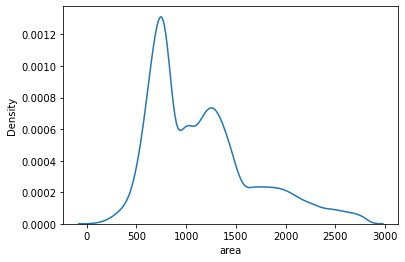

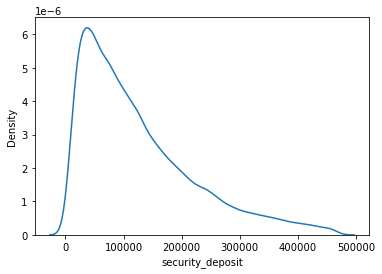

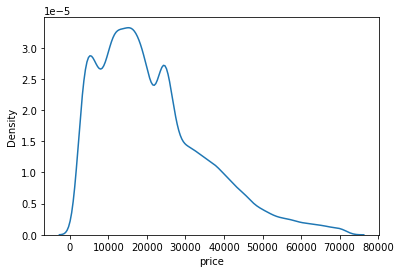

In [15]:
#Kde plots after removing outliers
continuous_var = ['area', 'security_deposit', 'price']
for i in continuous_var:
    sns.kdeplot(df_main_wo_id[i])
    plt.show()

In [16]:
for i in obj_cols:
    df_main_wo_id[i] = df_main_wo_id[i].astype('object') #type conversion: ordinal to categorical

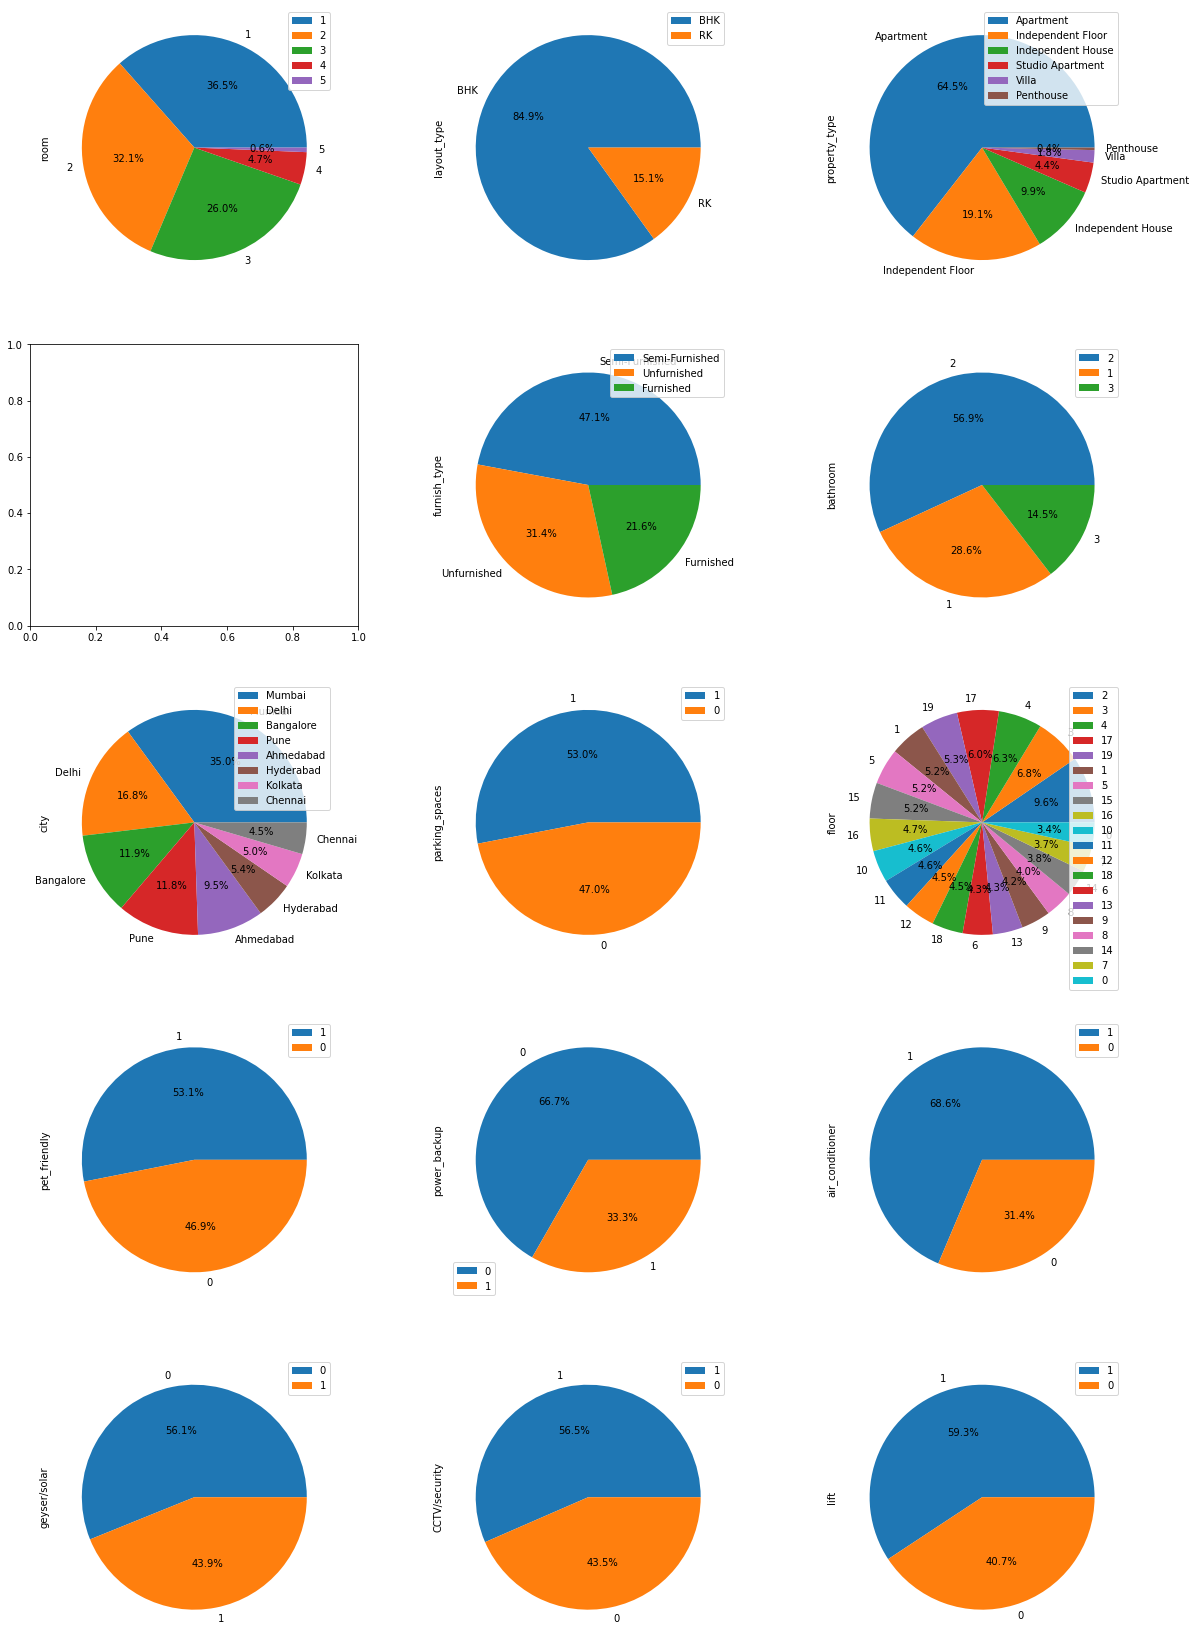

In [17]:
fig, ax = plt.subplots(nrows = 5, ncols=3, figsize=(20, 30))
cat_data = df_main_wo_id.select_dtypes('object').columns
for i, subplot in zip(cat_data, ax.flatten()):
    if i != "locality":
        (pd.DataFrame(df_main_wo_id[i].value_counts())).plot.pie(y = i, autopct= '%.1f%%', ax= subplot)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:259: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(x, y, annotation, **text_kwargs)


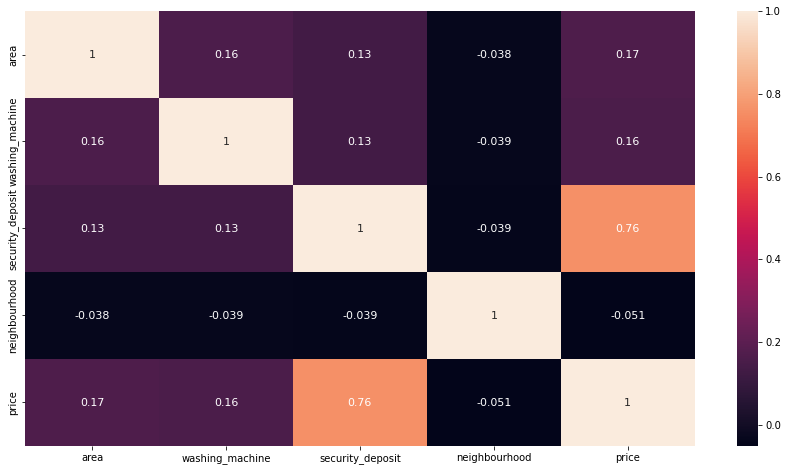

In [18]:
#Let's build heatmap to check multicollinearity
plt.figure(figsize=(15,8))
sns.heatmap(df_main_wo_id.corr(),annot=True,annot_kws={"Size":11})
plt.show()

In [19]:
# Ordinal Encoding of locality
listoflocality = list(pd.DataFrame(df_main_wo_id.groupby('locality')['price'].mean().sort_values()).index)

In [20]:
listoflocality

['dhanukarwadi',
 'Haranwali',
 'Teli Galli Cross Road',
 'Sector 21 Ulwe',
 'Sheela Vihar Colony',
 'Kurar Village',
 'Rangpuri',
 'Dehu',
 'Shyamnagar',
 'Sinhagad Fort',
 'Kunal Icon Road',
 'Nanded Phata',
 'Thorrur Village',
 'Jangali Maharaj Road',
 'Chandkhed',
 'Sector 24 Rohini',
 'Aziz Bagh Colony',
 'Venkat Nagar Colony',
 'Sector 10 Rohini',
 'Jubille Hills Road',
 'Ansari Nagar West',
 'Ahmedguda',
 'Devatabowli',
 'Jyoti Nagar',
 'IGNOU Road',
 'Thiruvidandhai',
 'Bhusari colony right',
 'Indrayani Nagar',
 'Kalwad',
 'Bhoiwada Kalyan',
 'Satyapuram Co operative Housing Society',
 'Sector 5 Road',
 'Ghodbander',
 'QU Block Uttari Pitampura',
 'Adarsh Nagar Lohgaon',
 'KalkereAgara Main Road',
 'Wagholi Kesnand Wadegaon Road',
 'Lallubhai Park Road 2',
 'Vishal Nagar Main',
 'Belur Nagasandra',
 'Pansila',
 'Munganoor',
 'Dwarka More',
 'Jambhulwadi Road',
 'Majiwada thane',
 'Mulund Check Naka',
 'Sahkar Nagar',
 'Silk Board',
 'Sector 6 HSR Layout',
 'Shahibaug Flyover',

In [21]:
from sklearn.preprocessing import OrdinalEncoder 
oe = OrdinalEncoder(categories= [listoflocality])
df_main_wo_id["locality"] = oe.fit_transform(df_main_wo_id.locality.values.reshape(-1,1))

In [22]:
df_main_wo_id.dtypes

room                 object
layout_type          object
property_type        object
locality            float64
area                  int64
furnish_type         object
bathroom             object
city                 object
parking_spaces       object
floor                object
pet_friendly         object
power_backup         object
washing_machine       int64
air_conditioner      object
geyser/solar         object
security_deposit      int64
CCTV/security        object
lift                 object
neighbourhood         int64
price                 int64
dtype: object

In [23]:
df_toml = df_main_wo_id.copy()

In [24]:
df_dummied = pd.get_dummies(df_toml, drop_first=True)

In [25]:
df_dummied[["bathroom_4", "bathroom_5"]] = 0

In [26]:
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87295 entries, 0 to 114479
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   locality                         87295 non-null  float64
 1   area                             87295 non-null  int64  
 2   washing_machine                  87295 non-null  int64  
 3   security_deposit                 87295 non-null  int64  
 4   neighbourhood                    87295 non-null  int64  
 5   price                            87295 non-null  int64  
 6   room_2                           87295 non-null  uint8  
 7   room_3                           87295 non-null  uint8  
 8   room_4                           87295 non-null  uint8  
 9   room_5                           87295 non-null  uint8  
 10  layout_type_RK                   87295 non-null  uint8  
 11  property_type_Independent Floor  87295 non-null  uint8  
 12  property_type_Ind

In [27]:
X = df_dummied.drop(columns='price', axis= 1)
y = df_dummied['price']

In [28]:
X

,locality,area,washing_machine,security_deposit,neighbourhood,room_2,room_3,room_4,room_5,layout_type_RK,...,floor_18,floor_19,pet_friendly_1,power_backup_1,air_conditioner_1,geyser/solar_1,CCTV/security_1,lift_1,bathroom_4,bathroom_5
0,1152.0,805,0,33012,1500,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1700.0,1093,0,74907,300,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,1492.0,1227,0,217314,1300,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1627.0,1022,0,217560,3600,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
5,1705.0,744,0,30160,900,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114473,1746.0,949,0,226425,100,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
114476,1409.0,593,1,28782,1700,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
114477,1843.0,827,0,7140,2400,0,0,0,0,1,...,0,0,0,1,1,1,1,0,0,0
114478,2356.0,2268,1,33416,2200,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [29]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(X)
X = pd.DataFrame(num_scaled, columns = X.columns)

In [30]:
y=y.values.reshape(-1,1)

In [31]:
from statsmodels.tools.tools import add_constant
X = add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
from sklearn.model_selection import train_test_split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, random_state=1, test_size = 0.3)

In [33]:
# model
import statsmodels.api as sm

SLR_model_b = sm.OLS(y_train_b, X_train_b).fit()
print(SLR_model_b.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1857.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:02:33   Log-Likelihood:            -6.4204e+05
No. Observations:               61106   AIC:                         1.284e+06
Df Residuals:                   61056   BIC:                         1.285e+06
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [34]:
y_pred_train = SLR_model_b.predict(X_train_b)
y_pred_test = SLR_model_b.predict(X_test_b)

In [35]:
X_train_b.columns

Index(['const', 'locality', 'area', 'washing_machine', 'security_deposit',
       'neighbourhood', 'room_2', 'room_3', 'room_4', 'room_5',
       'layout_type_RK', 'property_type_Independent Floor',
       'property_type_Independent House', 'property_type_Penthouse',
       'property_type_Studio Apartment', 'property_type_Villa',
       'furnish_type_Semi-Furnished', 'furnish_type_Unfurnished', 'bathroom_2',
       'bathroom_3', 'city_Bangalore', 'city_Chennai', 'city_Delhi',
       'city_Hyderabad', 'city_Kolkata', 'city_Mumbai', 'city_Pune',
       'parking_spaces_1', 'floor_1', 'floor_2', 'floor_3', 'floor_4',
       'floor_5', 'floor_6', 'floor_7', 'floor_8', 'floor_9', 'floor_10',
       'floor_11', 'floor_12', 'floor_13', 'floor_14', 'floor_15', 'floor_16',
       'floor_17', 'floor_18', 'floor_19', 'pet_friendly_1', 'power_backup_1',
       'air_conditioner_1', 'geyser/solar_1', 'CCTV/security_1', 'lift_1',
       'bathroom_4', 'bathroom_5'],
      dtype='object')

In [36]:
X_test_b.columns

Index(['const', 'locality', 'area', 'washing_machine', 'security_deposit',
       'neighbourhood', 'room_2', 'room_3', 'room_4', 'room_5',
       'layout_type_RK', 'property_type_Independent Floor',
       'property_type_Independent House', 'property_type_Penthouse',
       'property_type_Studio Apartment', 'property_type_Villa',
       'furnish_type_Semi-Furnished', 'furnish_type_Unfurnished', 'bathroom_2',
       'bathroom_3', 'city_Bangalore', 'city_Chennai', 'city_Delhi',
       'city_Hyderabad', 'city_Kolkata', 'city_Mumbai', 'city_Pune',
       'parking_spaces_1', 'floor_1', 'floor_2', 'floor_3', 'floor_4',
       'floor_5', 'floor_6', 'floor_7', 'floor_8', 'floor_9', 'floor_10',
       'floor_11', 'floor_12', 'floor_13', 'floor_14', 'floor_15', 'floor_16',
       'floor_17', 'floor_18', 'floor_19', 'pet_friendly_1', 'power_backup_1',
       'air_conditioner_1', 'geyser/solar_1', 'CCTV/security_1', 'lift_1',
       'bathroom_4', 'bathroom_5'],
      dtype='object')

In [37]:
from sklearn.metrics import mean_squared_error
mse_train = round(mean_squared_error(y_train_b, y_pred_train),4)
mse_test = round(mean_squared_error(y_test_b, y_pred_test),4)


rmse_train = round(np.sqrt(mse_train), 4)
rmse_test = round(np.sqrt(mse_test), 4)
print(rmse_train)
print(rmse_test)

8848.6389
8874.1146


In [38]:
SLR_model_b = sm.OLS(y, X).fit()
print(SLR_model_b.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     2654.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:02:33   Log-Likelihood:            -9.1727e+05
No. Observations:               87295   AIC:                         1.835e+06
Df Residuals:                   87245   BIC:                         1.835e+06
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87295 entries, 0 to 87294
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   const                            87295 non-null  float64
 1   locality                         87295 non-null  float64
 2   area                             87295 non-null  float64
 3   washing_machine                  87295 non-null  float64
 4   security_deposit                 87295 non-null  float64
 5   neighbourhood                    87295 non-null  float64
 6   room_2                           87295 non-null  float64
 7   room_3                           87295 non-null  float64
 8   room_4                           87295 non-null  float64
 9   room_5                           87295 non-null  float64
 10  layout_type_RK                   87295 non-null  float64
 11  property_type_Independent Floor  87295 non-null  float64
 12  property_type_Inde

# TEST

In [40]:
df_test = pd.read_csv("test_csv2022.csv")
df_test.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,27345,1,BHK,Independent House,Whitefield Hope Farm Junction,1088,Semi-Furnished,1,Bangalore,1,5,1,0,1,1,0,175749,1,0,700
1,111493,1,BHK,Studio Apartment,Worli,605,Furnished,1,Mumbai,0,1,0,0,0,1,1,15072,0,0,600
2,176972,3,BHK,Apartment,Aundh,1005,Furnished,4,Pune,1,5,0,0,0,1,1,29715,1,0,1900
3,66650,3,RK,Apartment,Sarvpriya Vihar,639,Semi-Furnished,3,Delhi,1,18,1,1,1,1,1,131576,1,1,3300
4,72437,1,BHK,Apartment,Khirki Extension,580,Unfurnished,1,Delhi,0,9,0,0,0,0,1,26005,0,1,1600


In [41]:
df_test_property_id = df_test["Property_ID"] #drop ID
df_test = df_test.drop(columns="Property_ID")

In [42]:
for i in obj_cols:
    df_test[i] = df_test[i].astype('object') #type conversion

In [43]:
# print(df_test.shape)
# Q1 = df_test.quantile(0.25)
# Q3 = df_test.quantile(0.75)
# IQR = Q3 - Q1
# df_test = df_test[~((df_test < (Q1 - 1.5 * IQR)) | (df_test > (Q3 + 1.5 * IQR))).any(axis=1)]
# df_test.shape


In [44]:
listoflocality = listoflocality+ ['Venkatapuram Alwal Secundrabad', 'Srinivaspura', 'Santhosapuram', 'Bandstand Road', 'Sector 9 Airoli', 'Keelkattalai', 'Union Park', 'Punjagutta Market', 'Allalasandra', 'Gummudipoondi', 'Sanchar Nagar MCECHS Layout Bengaluru', 'Ghoda Camp Road', 'Shankarseth Road', 'Borivali West New Ashok Nagar', 'Mahakali Cave Road', 'Coonoor', 'Pratik Nagar', 'Gulmohar Cross Road Number 6', 'Rambagh Colony', 'Bhawani Nagar Society', 'Forjett Hill Road', 'Kabool Nagar', 'Chotto Chandpur', 'Pankti Co operative Housing Society', 'Gurudwara Road', 'Vazhayila', 'Bandel', 'Hussaini Alam', 'Kirari Suleman Nagar', 'Kondwa khurd road', 'Ranganathan Colony', 'Eastern Express Highway Vikhroli', 'ahimsa marg', 'Dharamveer Nagar', 'Bellary Road Hebbal Kempapura', 'Lajpat Nagar 4', 'Tukaram Nagar', 'K P H B 9 Phase', 'Thurahalli', 'gattahalli', 'Lake View Layout Road', 'Malcha', 'Thakurpukur Bazar', 'Old MHB Colony Mumbai', 'Talegaon', 'Nihal Vihar Delhi', 'Malur', 'Sector17 Rohini', 'Vivek Vihar Phase I', 'PJR Layout', 'Bhakti Park', 'Begur Road', 'Santhosh Nagar', 'Tiljala Road', 'Vasant Vihar Complex', 'Shirur', 'Panchavati Colony', 'Kherwadi', 'Whitefield Hoskote Road', 'Mangawadi', 'Bevarly Park', 'Begampur Park', 'Gauranganagar', 'Saptagiri Colony', 'Samay Pur', 'Residential Flat Haridevpur', 'Baishnabghata Patuli Township', 'Major Bhola Nath Colony', 'Venkataramana Colony', 'Srinivas Nagar', 'Venkatagiri', 'Valarkundram', 'Desale Pada', 'Palani Andavar Koil Street', 'Bongloor', 'Manchirevula', 'BHEL OLD MIG', 'Venugopal Reddy Layout', 'Baner Pashan Link Road', 'Mappedu Junction', 'Dharavi', 'Kalasipalya', 'SG Highway Service Road', 'Ramesh Nagar raja garden bali nagar', 'Eklavya Colony', 'Jagat Ram Park', 'Dashrath Nagar Bhekrai Nagar', 'D N Ngr', 'City Centre 1', 'Sri Iyappa Nagar', 'Thirupalya', 'MS Ramaiah North City Bangalore', 'Thirupalya Road', 'Tambaram to Mudichur road', 'Tolaram Colony', 'Iyyapa Nagar', 'Dasanapura', 'Wadegaon', 'Qutab Institutional Area', 'Kadabagere', 'Padgha', 'Sinthan Nagar', 'Ameenpur Village Patancheru', 'HBR layout 5th Block', 'Ramanashree California Gardens Layout', 'Andheri Kurla Road', 'Wanawadi Gaon', 'Thammenahalli Village', 'Secunderabad Railway Station Road', 'Banjara Hills Road Number 12', 'Ramasandra', 'A1 Block Paschim Vihar Delhi', 'Sri Sai Nagar', 'Nehru Nagar Kurla', 'Classic Paradise Layout', 'Sector 10 Kamothe', 'S D A New', 'Basavanapura', 'Vediri Township', 'Laxmi Nagary', '24 Sector Number 3 Road', 'Naktala Road', 'Manyata Tech Park Nagawara', 'Gudighattanahalli', 'Vattinagulapally', 'Sector 8 Charkop', 'Shanti Mohalla', 'Kalyan', 'Digambar Nagar', 'Meghani Nagar', 'Shastri Nagar Lane 2', 'Brijwasan', 'Paschim Barisha', 'DP Road', 'LHR Layout', 'Iggalur', 'Katrap', 'Gudimalkapur', 'Ramgad Nagar', 'Bangalore', 'Dodda Banaswadi Main Road', '26 Sector 15 Road', 'Kempe Gowda Nagar', 'RK Hegde Nagar Bangalore', 'Nolambur', 'Nimbalkar Nagar Lohgaon', 'Whitefield Hagadur', 'Dum Dum Road', 'Sector18 Dwarka', 'Mudialy Road', 'jvpd scheme', 'SectorB Vasant Kunj', 'Khajisonnanahalli', 'Block QP Poorvi Pitampura', 'Hemkunt Colony', 'Selimpur Road', 'Dadachi Wasti', 'Nabapally', 'Uma Nagar', 'Vinay Nagar', 'Tribeni', 'Shedge Vasti PimpriChinchwad', 'Annai Sathya Nagar', 'Mulshi', 'Basant Garden', 'Allwyn Colony', 'Venkatraya Nagar', 'Kanhe', 'Okkiyam', 'Bella Tuscany', 'Murarbaug', 'Wadarvadi', 'Sector 21 Nerul', 'Geddalahalli', 'Kambar Nagar Kolathur', 'Neredmet X Road Vayupuri Sainikpuri X Road', 'MLA Colony Road Number 12', 'Kengeri Hobli', 'R R NAGAR', 'Ayapanthangal', 'Kalher Bhiwandi Road', 'BTM 4th stage', 'Chandavarkar Road', 'RPC layout', 'Kasheli', 'Raj Nagar', 'Bhagyanagar Colony Kukatpally', 'Milan Subway', 'Ambalipura', 'Saravali Village', 'TC Palya Main', 'Rasapunja', 'Reclamation', 'Sector 23 Ulwe', 'Bondel Road', 'Lonikand', 'Chakala', 'Saswad', '27 Sector 15 Road', 'Military Dairy Farm Road', 'Jambli Galli', 'Govindpuri Extension', 'Azad ngr Metro station', 'Park Street', 'Nemam', 'Tnagar', 'B K Dutt Colony', 'Czech Colony Hyderabad', 'Sector 19 Ulwe', 'Sector 11 Belapur', 'Patteghar Palya Main Road', 'Malaysian Township Hyderabad', 'Mayfair Road', 'Kanchrapara Loco', 'Mourigram', 'Kvalasanahalli', 'Bhoir Wadi', 'Vettuvankeni', 'Yeshwantpur Village', 'Block SU Uttari Pitampura', 'Gulmohar Road', 'BKC Bandra', 'Hinjewadi Phase 1', 'Periyamet', 'Anjaneya Nagar', 'Bhattapaldi', 'Tharapakkam', 'Sultan Palya', 'Sector 8', 'Jagathy', 'Dargajogihalli', 'Ananthapura main', 'Kr Puram Seegehalli', 'Sector-14 Sanpada', 'Bikramgarh', 'Kovalam', 'Shahpur', 'Juinagar', 'Vishal Nagar', 'New Barrakpur', 'Bhojerhat', 'Chaloda', 'Kanakanagar']

In [45]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories= [listoflocality])
df_test["locality"] = oe.fit_transform(df_test.locality.values.reshape(-1,1)) #ordinal encoding

In [46]:
df_totest = pd.get_dummies(df_test, drop_first=True) #getting dummies

In [47]:
num_scaled = X_scaler.transform(df_totest)
df_num_scaled_test = pd.DataFrame(num_scaled, columns = df_totest.columns) #scaling

In [48]:
X_test = df_num_scaled_test
X_test =add_constant(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [49]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   const                            20203 non-null  float64
 1   locality                         20203 non-null  float64
 2   area                             20203 non-null  float64
 3   washing_machine                  20203 non-null  float64
 4   security_deposit                 20203 non-null  float64
 5   neighbourhood                    20203 non-null  float64
 6   room_2                           20203 non-null  float64
 7   room_3                           20203 non-null  float64
 8   room_4                           20203 non-null  float64
 9   room_5                           20203 non-null  float64
 10  layout_type_RK                   20203 non-null  float64
 11  property_type_Independent Floor  20203 non-null  float64
 12  property_type_Inde

In [50]:
# testpredictedarray = xgbtuned.predict(X_test)
testpredictedarray = SLR_model_b.predict(X_test)

In [51]:
testpredicted = pd.DataFrame({"Property_ID":df_test_property_id, "price": testpredictedarray})
testpredicted = testpredicted.set_index("Property_ID")
testpredicted.head()

,price
Property_ID,
27345,25823.054077
111493,4335.862930
176972,7431.486900
66650,22059.939846
72437,9411.800338


In [52]:
testpredicted.to_csv("slrpredictionscaled.csv")

In [53]:
df_predicted=pd.read_csv("slrpredictionscaled.csv")
df_predicted.head()

,Property_ID,price
0,27345,25823.054077
1,111493,4335.862930
2,176972,7431.486900
3,66650,22059.939846
4,72437,9411.800338


In [55]:
df_predicted.shape

(20203, 2)